# Group 38 Project Final Report

# Introduction
### Description
This report investigates how a player's age and hours can be used to determine if they signed up for the game's newsletter. The data for players.csv was collected by a computer science research group at UBC, guided by Frank Wood, who gathered information on video game play patterns of a MineCraft server they have set up. As players play the game, their actions are tracked. The research group made sure to use adequate resources, such as server hardware and software licensing, to manage the volume of players they gathered. As the raw data in players.csv is not in a tidy format, this report focuses on cleaning the dataset, generating summary statistics, and creating visualizations to analyze trends. Through these steps, the report provides insights that help answer the classification question.

### Question: 
Can a player’s age and hours played predict whether they subscribe to the game’s newsletter?

### Summary of Variable names
The players.csv dataset has 196 observations with 7 variables, each variable representing information about that player:

| Variable     | Type              | Description                                                     |
| :----------- | :---------------- | :-------------------------------------------------------------- |
| experience   | Categorical (chr) | Player's skill level (Veteran, Pro, Amateur, Regular, Beginner) |
| subscribe    | Boolean (lgl)     | Whether the player has subscribed (TRUE/FALSE)                  |
| hashedEmail  | Categorical (chr) | Hashed email address for privacy                                |
| played_hours | Numeric (dbl)     | Number of hours the player has played                           |
| name         | Categorical (chr) | Player's first name                                             |
| gender       | Categorical (chr) | Gender of the player (Male, Female, Other, Prefer not to say)   |
| Age          | Numeric (dbl)     | Player’s age                                                    |

### Issues
| Issue | Description of Issue | Solution |
| :------| :-------------------- | :-------- |
| Duplicate Entries | Some participants have multiple records | Ensure these are distinct play sessions and not duplicates. Group data by hashedEmail to verify if multiple sessions correspond to the same user or if it's a data entry error	|
| Missing Data | Missing values in key columns like start_time, end_time, experience, subscribe, played_hours | Ignore missing values drop_na(), Fill in missing values using mean imputation step_impute_mean(all_predictors()) |
| Time Format Consistency | The start_time and end_time columns use a string format | Convert these strings to a proper datetime format |
| Age Distribution | The age range is wide and not evenly distributed | Create age categories (e.g., 0-18, 19-35, 36-50, etc.) to simplify analysis|
| Gender Representation | Some entries for gender are non-binary or unknown | Handle these cases by either grouping non-binary responses into a category or excluding them |
| Mutiple entries | Ensure there are no issues like multiple hashed emails for the same user. This could indicate duplicates or incorrectly handled data during hashing |  Verify that each hashedEmail corresponds to a unique user |
| Inconsistent Session Lengths | The played_hours column can have values that seem unusually short, suggesting that some players may have logged incomplete sessions | Set thresholds for what constitutes a valid session duration. Filter out sessions that fall below the threshold |
| Correlation Between Variables | Columns like experience and played_hours might have a strong relationship | Use correlation metrics or scatter plots to visualize relationships |




In [1]:
library(tidyverse)
library(tidymodels)
library(lubridate)
library(dbplyr)
library(ggplot2)

players<- read_csv("players.csv")
set.seed(1234) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players_recode <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe, "Subscribed" = "TRUE", "Not subscribed" = "FALSE"))
players_recode

players_mean <- players |>
select(played_hours, Age) |>
map_df(mean, na.rm = TRUE)



experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Subscribed,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Subscribed,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,Not subscribed,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,Subscribed,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,Subscribed,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,Subscribed,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,Subscribed,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,Not subscribed,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,Subscribed,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


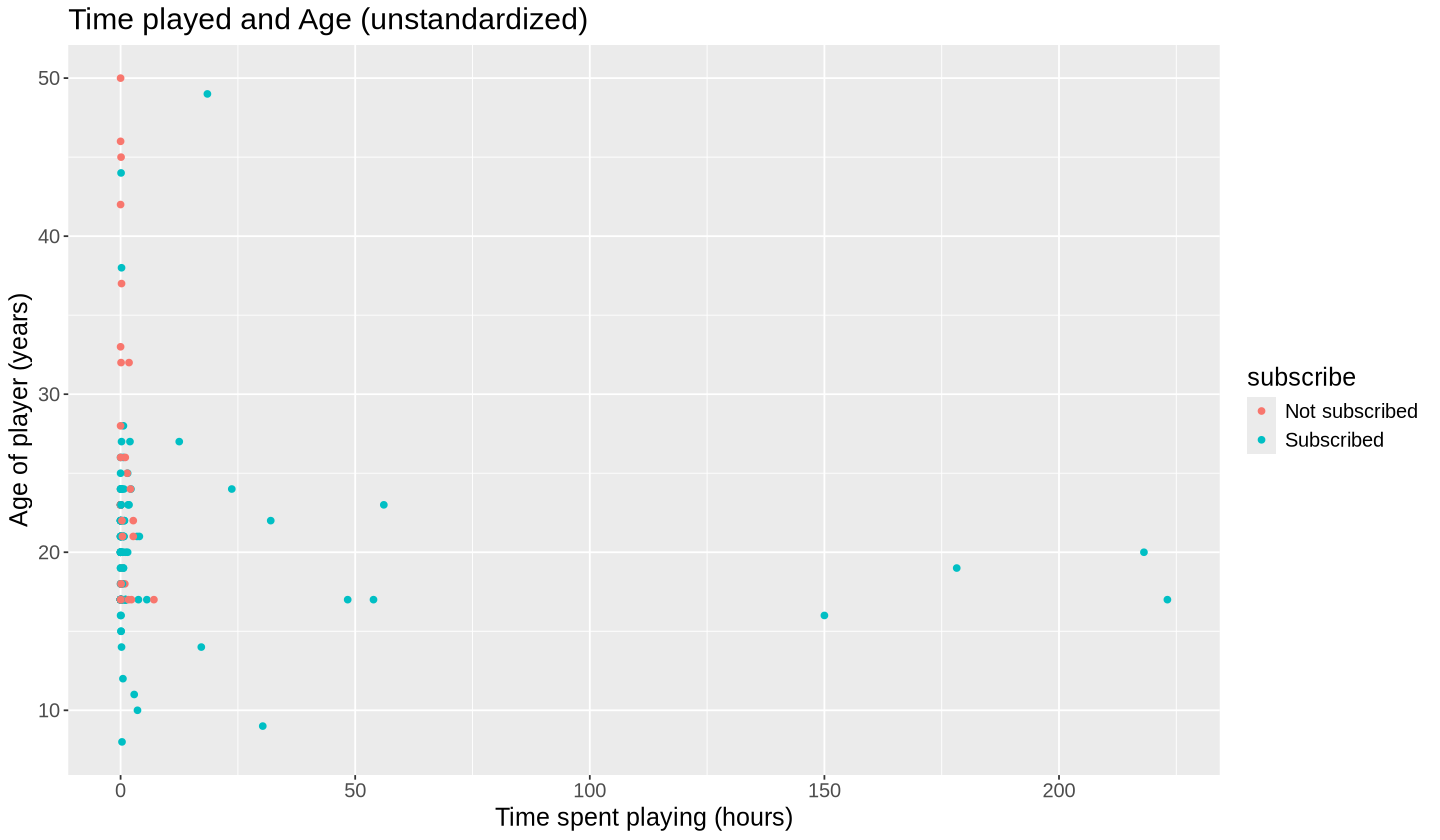

In [3]:
options(repr.plot.width=12, repr.plot.height=7)
players_plot <- players_recode |> 
ggplot(aes(x = played_hours, y = Age, color = subscribe)) + 
geom_point() +
labs(x = "Time spent playing (hours)", y = "Age of player (years)", title = "Time played and Age (unstandardized)") + 
theme(text = element_text(size = 15))
players_plot

Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


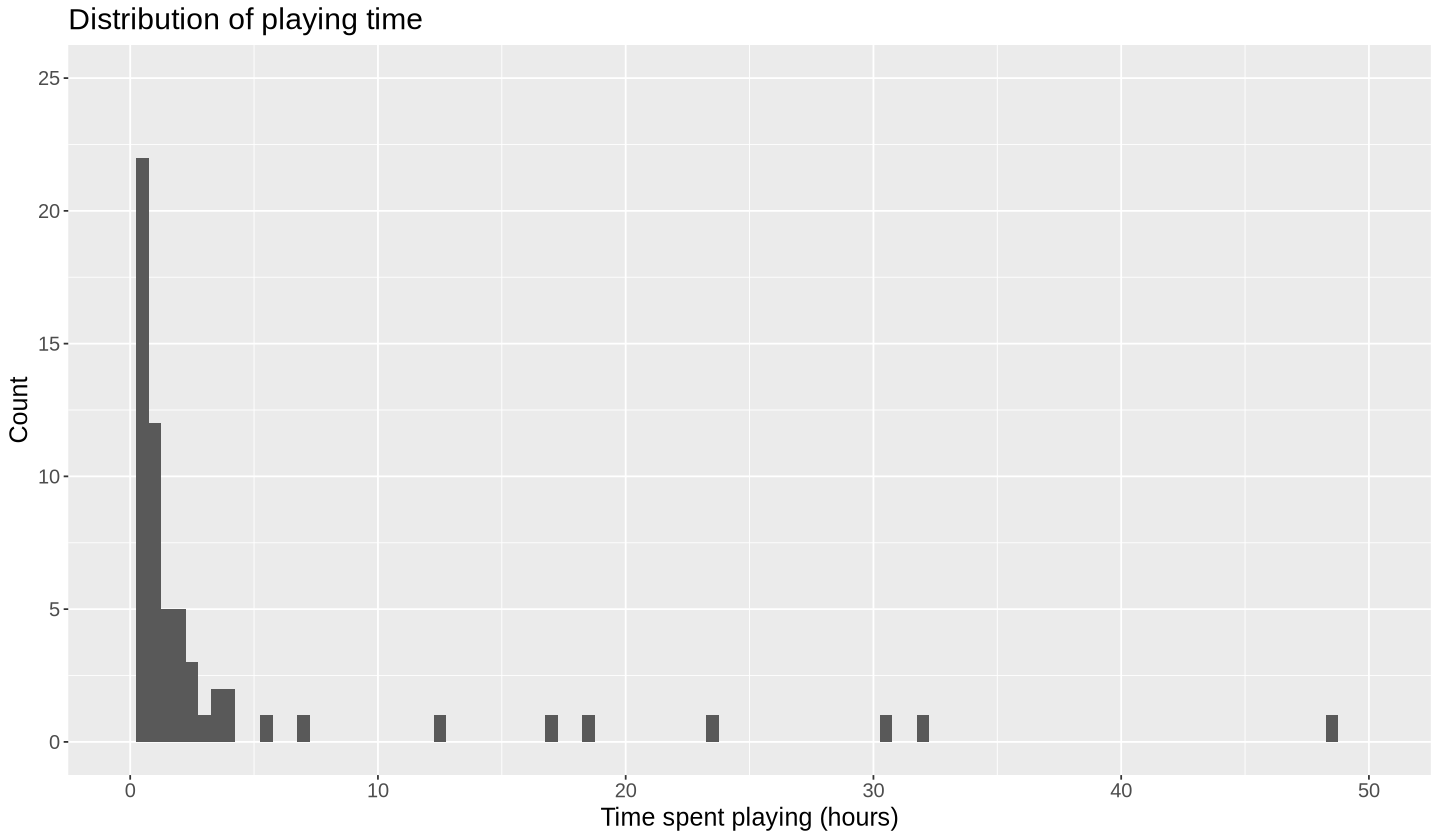

In [4]:
players_histogram <- ggplot(players_recode, aes(x = played_hours)) + 
geom_histogram(binwidth = 0.5) +
labs(x = "Time spent playing (hours)", y = "Count", title = "Distribution of playing time") + 
theme(text = element_text(size = 15))
       
players_histogram + scale_x_continuous(limits = c(0, 50)) + scale_y_continuous(limits = c(0, 25))

In [5]:
#Classification algorithm:

In [6]:
subscriber_split <- initial_split(players_recode, prop = 0.70, strata = subscribe)  
subscriber_train <- training(subscriber_split)   
subscriber_test <- testing(subscriber_split)

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 26 rows.
               ✖ Assigned data has 27 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 27 to size 26.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





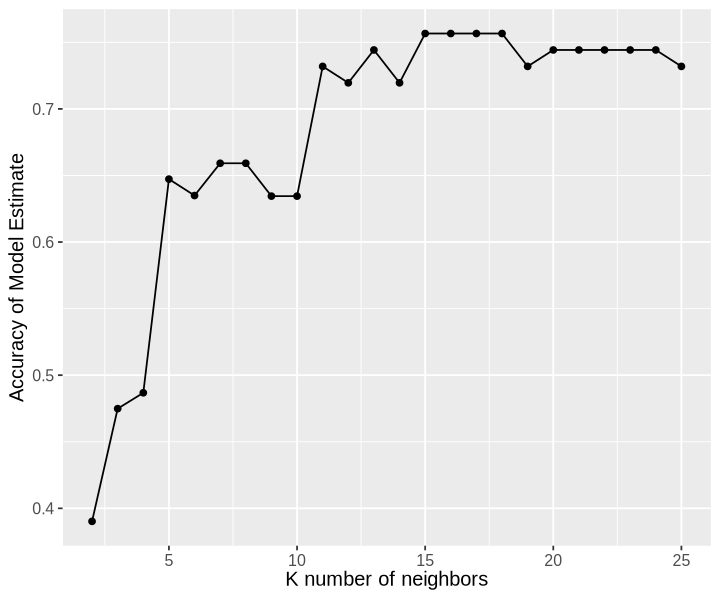

In [7]:
options(repr.plot.height = 5, repr.plot.width = 6)

data_recipe <- recipe(subscribe ~ Age + played_hours, data = subscriber_train)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

data_vfold <- vfold_cv(subscriber_train, v = 5, strata = subscribe)

kvalues_tibble <- tibble(neighbors = 2:25)

knn_results <- workflow() |> 
    add_recipe(data_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = data_vfold, grid = kvalues_tibble)

data_metrics <- collect_metrics(knn_results)

accuracies <- data_metrics |>
filter(.metric == "accuracy") |>
mutate(neighbors = as.numeric(neighbors), mean = as.numeric(mean)) |>
drop_na()


cross_val_plot <- accuracies |>
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() +
    geom_line() + 
    labs(x = "K number of neighbors", y = "Accuracy of Model Estimate") + 
    theme(text = element_text(size = 12))

cross_val_plot

In [8]:
##using our new value of K --> 9


subscriber_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 19) |>
    set_engine("kknn") |>
    set_mode("classification")

subscribers_results <- workflow() |> 
    add_recipe(data_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_recode)

subscribers_results




Warning message:
“tune samples were requested but there were 196 rows in the data. 191 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2680412
Best kernel: rectangular
Best k: 191

# Discussion
By exploring the players.csv dataset and creating visualizations, it can be concluded that the variables, age and hours are not effective in predicting whether a player subscribed to the game’s newsletter. Therefore, these predictors are not suitable for answering our specific question.
In the process of finding a suitable value for K (how many neighbors involved in the voting) we discovered that the accuracies for all the possible values for K were not that accurate. When we observed the graph displaying the K value on the x axis and the accuracy on the Y axis, we noticed that after a certain point (around K = 20) that the accuracy remains constant. It was important for our understanding of how we decided to select K that our data set only had 196 observations, meaning extremely high values might not actually be predicting in a meaningful way, and rather “relying” on how the majority of the subscribe variable was ‘TRUE’ anyway. Essentially, if we set our K to a number large enough, it our accuracy would simply be the proportion of the “subscribe” variable that would be the dominant/majority category, whether that be true or false.  

We expected to see a more distinct relationship between age, the number of hours played and the likelihood of someone being subscribed to the newsletter. For instance, we expected some sort of distinguished relationship perhaps between age and subscriber ship that would allow us to better predict. For instance, maybe older people seem to enjoy newsletters more than younger groups. Based on our played_hours variable observed in our earlier observation, there is a clear and distinct relationship present, as it appears that players that have played a lot are always subscribed to the newsletter. However, there are very few observations represented from that category, so it did not impact our findings/improve our predictive abilities much. 
Most of the players in the data set have barely played any hours at all, and many have played 0. We hypothesized that perhaps because a massive number of observations have extremely low values for played_hours, the distance calculations were made less distinct from each other, as people were not equally dispersing themselves into more defined or predictable groups, decreasing the predictive ability of our predictor variables.

The findings that many of the players had zero hours impacts our question suggests that a large portion of the players in the players.csv dataset never actually played the game. This does not help the visualization of our data at all as this reduces the variability in the dataset, making it harder to detect any patterns. Thus possibility skewing the results, and suggesting that the hours played have no correlation with newsletter subscriptions, when in truth the data is overflowed with many players with zero played hours. 

Based on the fact that we struggled to utilize those predictor variables to accurately predict subscribership, it begs the question if there are better variables that are more indicative of whether or not someone is likely to subscribe to the newsletter or not. Perhaps gender and experience would be better predictors, and another algorithm could determine whether those were more accurate at predicting subscribership. Another question could be about the interpretation of results if you were interested in boosting engagement: if a group is highly likely to subscribe, should you focus efforts on making sure those people all subscribe, or target the groups that are not subscribing at very high rates. 
